[67.30998637]


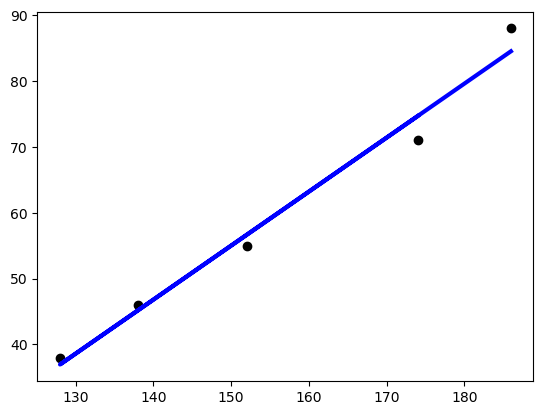

In [ ]:
# 선형회귀 실습

import matplotlib.pylab as plt
from sklearn import linear_model

reg = linear_model.LinearRegression()

x =[[174], [152], [138], [128], [186]]
y = [71,55,46,38,88]
reg.fit(x,y) # 학습

print(reg.predict([[165]]))

# 학습 데이터와 y 값을 산포도로 그린다.
plt.scatter(x,y,color='black')

# 학습 데이터를 입력으로 하여 예측값을 계산한다.
y_pred = reg.predict(x)

# 학습 데이터의 예측값을 선그래프로 그린다.
# 계산된 기울기와 y 절편을 가지는 직선이 그려진다.
plt.plot(x,y_pred,color='blue',linewidth=3)
plt.show()

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

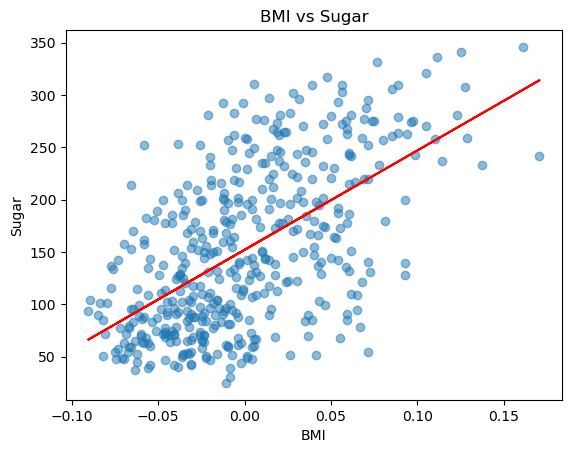

In [4]:
# 선형 회귀 : 당뇨병 예제

from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 데이터셋 로드
diabetes = load_diabetes()
print(diabetes.DESCR)

# BMI와 혈당 데이터 추출
x = diabetes.data[:,2].reshape(-1,1) 
y = diabetes.target.reshape(-1,1)

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(x,y)

# 회귀선 그리기
y_pred = model.predict(x)
plt.scatter(x,y,alpha=0.5)
plt.plot(x,y_pred,color='red')
plt.title('BMI vs Sugar')
plt.xlabel('BMI')
plt.ylabel('Sugar')
plt.show()

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]
(442, 10)
[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]
 [-0.08380842]
 [ 0.01750591]
 [-0.02884001]
 [-0.00189471]
 [-0.02560657]
 [-0.01806189]
 [ 0.04229559]
 [ 0.01211685]
 [-0.0105172 ]
 [-0.01806189]
 [-0.05686312]
 [-0.02237314]
 [-0.00405033]
 [ 0.06061839]
 [ 0.03582872]
 [-0.01267283]
 [-0.07734155]
 [ 0.05954058]
 [-0.02129532]
 [-0.00620595]
 [ 0.04445121]
 [-0.06548562]
 [ 0.12528712]
 [-

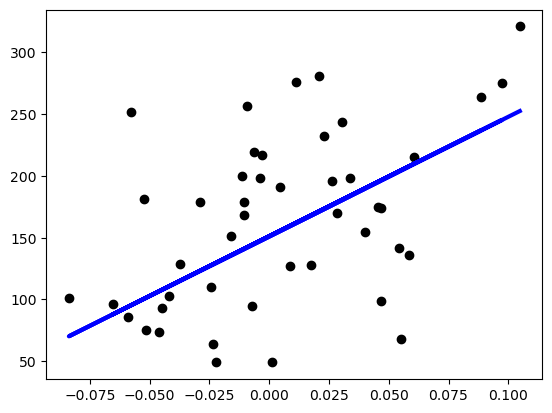

In [6]:
# BMI 선택, 혈당치와의 관계를 선형회귀로 분석석

import matplotlib.pylab as plt
import numpy as np
from sklearn import datasets, linear_model

# 당뇨병 데이터 세트를 적재한다.
diabetes_x, diabetes_y = datasets.load_diabetes(return_X_y=True)

print(diabetes_x)
print(diabetes_x.data.shape)

# 하나의 특징(BMI)만 추려내서 2차원 배열로 만든다. BMI 특징의 인덱스가 2이다. 
diabetes_x_new = diabetes_x[:, np.newaxis, 2]

print(diabetes_x_new)
print(diabetes_x_new.data.shape)

# 학습 데이터와 테스트 데이터를 분리한다. 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(diabetes_x_new, diabetes_y, test_size=0.1, random_state=0)

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)  # 학습

# 테스트 데이터로 예측해보자
y_pred = regr.predict(x_test)

plt.scatter(x_test, y_test, color='black')
plt.plot(x_test,y_pred,color='blue',linewidth=3)
plt.show()

In [ ]:
# sklearn을 이용한 kNN 알고리즘 실습 1

from sklearn.datasets import load_iris
iris = load_iris()

from sklearn.model_selection import train_test_split

# 입력과 출력을 설정한다.
x = iris.data
y = iris.target

# 전체 데이터를 학습 데이터와 테스트 데이터의 비율 (80:20)으로 분할한다.
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=4)
print(x_train.shape)
print(x_test.shape)

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# 학습 단계
knn = KNeighborsClassifier(n_neighbors=5) # k=5로 설정
knn.fit(x_train, y_train)

# 테스트 단계
y_pred = knn.predict(x_test)

# 정확도 점수 출력
scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

(120, 4)
(30, 4)
0.9666666666666667


In [8]:
# sklearn을 이용한 kNN 알고리즘 실습 2

from sklearn.datasets import load_iris
iris = load_iris()

from sklearn.model_selection import train_test_split

# 입력과 출력을 설정한다.
x = iris.data
y = iris.target

# 전체 데이터를 학습 데이터와 테스트 데이터 비율 (80:20)으로 분할한다.
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=4)
print(x_train.shape)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x,y)

# 0 = setosa, 1 = versicolor, 2 = virginica
classes = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

# 아직 보지 못한 새로운 데이터를 제시해보자.
x_new = [[3,4,5,2],
         [5,4,2,2]]
y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])

(120, 4)
versicolor
setosa


In [ ]:
# sklearn을 이용한 SVM의 SVC 알고리즘 실습 1

from sklearn.datasets import load_iris
iris = load_iris()

from sklearn.model_selection import train_test_split

# 입력과 출력을 설정한다.
x = iris.data
y = iris.target

# 전체 데이터를 학습 데이터와 테스트 데이터 비율 (80:20)으로 분할한다.
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 4)
print(x_train.shape)
print(x_test.shape)

from sklearn import svm
from sklearn import metrics

svc = svm.SVC(gamma=0.1, C = 5) # svm 분류 모델 SVC 객체 생성

# iris 데이터로 학습
svc.fit(x_train, y_train)

# 테스트 단계
y_pred = svc.predict(x_test)

# 정확도 점수 출력
scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

(120, 4)
(30, 4)
0.9666666666666667


In [ ]:
# sklearn을 이용한 SVM의 SVC 알고리즘 실습 2

from sklearn.datasets import load_iris
iris = load_iris()

from sklearn.model_selection import train_test_split

# 입력과 출력을 설정한다.
x = iris.data
y = iris.target

# 전체 데이터를 학습 데이터와 테스트 데이터 비율 (80:20)으로 분할한다.
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=4)
print(x_train.shape)

from sklearn import svm

svc = svm.SVC(gamma=0.1, C=5) # svm 분류 모델 SVC 객체 생성

# iris 데이터로 학습
svc.fit(x,y)

# 0 = setosa, 1 = versicolor, 2 = virginica
classes = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

# 아직 보지 못한 새로운 데이터를 제시해보자.
x_new = [[3,4,5,2],
         [5,4,2,2]]
y_predict = svc.predict(x_test)

print(classes[y_predict[0]])
print(classes[y_predict[1]])


(120, 4)
virginica
setosa


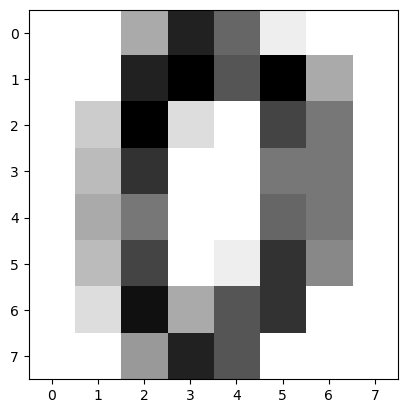

0.9861111111111112


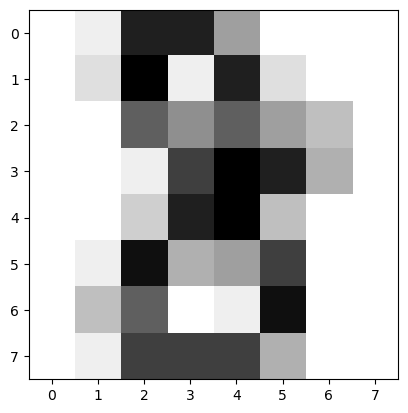

[2]
2


In [13]:
# sklearn을 이용한 kNN 알고리즘 실습 3

import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap = plt.cm.gray_r, interpolation = 'nearest')
plt.show() # 이미지를 화면에 출력

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1)) # 2차원 이미지를 1차원으로 변환

x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6) # k=6로 설정
knn.fit(x_train, y_train) # 학습

# 테스트 데이터로 예측해본다.
y_pred = knn.predict(x_test)

# 정확도를 계산한다.
scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

# 이미지를 출력하기 위하여 평탄화된 이미지를 다시 8*8 형상으로 만든다.
plt.imshow(x_test[0].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show() # 이미지를 화면에 출력
y_pred = knn.predict([x_test[10]])  # 입력은 항상 2차원 행렬이어야 한다.
print(y_pred) # 예측한 숫자
print(y_test[10]) # 실제 숫자

In [2]:
# sklearn을 이용한 Trees 알고리즘 실습

from sklearn import tree

x =[[0,0], [1,1]]
y = [0,1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x,y)

y_pred = clf.predict([[2., 2.]])
print(y_pred)

[1]


학습 데이터 정확도: 1.0
테스트 데이터 정확도: 0.9666666666666667


[Text(0.4, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [41, 38, 41]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.35, 0.8333333333333333, 'True  '),
 Text(0.5, 0.75, 'x[3] <= 1.65\ngini = 0.499\nsamples = 79\nvalue = [0, 38, 41]'),
 Text(0.45, 0.8333333333333333, '  False'),
 Text(0.2, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.176\nsamples = 41\nvalue = [0, 37, 4]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.3, 0.4166666666666667, 'x[0] <= 6.05\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.2, 0.25, 'x[2] <= 5.05\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.5833333333333334, 'x[2] <= 4.85\ngini = 0.051\nsamples = 38\nvalue = [0, 1, 37]'),
 

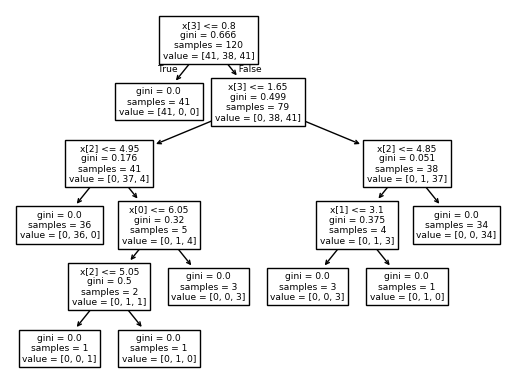

In [1]:
# 결정 트리를 이용한 붓꽃 분류

from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

iris = datasets.load_iris()
x, y = iris.data, iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=50, test_size = 0.20)

clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

y_pred = clf.predict(x_train)
print("학습 데이터 정확도:", accuracy_score(y_true = y_train, y_pred = y_pred))

y_pred = clf.predict(x_test)
print("테스트 데이터 정확도:", accuracy_score(y_true = y_test, y_pred = y_pred))

from sklearn.tree import plot_tree
plot_tree(clf)

[[16.66666667 15.83333333]
 [72.16666667 75.66666667]]
[0 0 0 0 0 0 1 1 1 1 1 1]


c:\Users\tlstk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


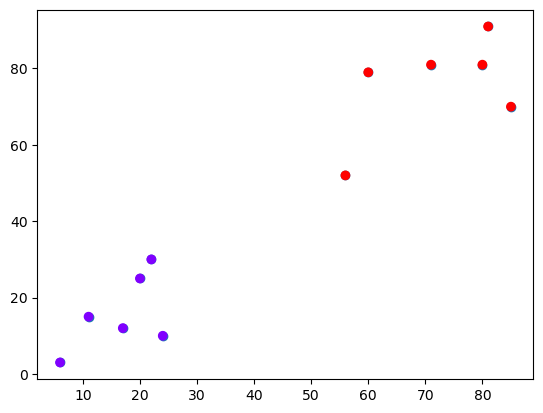

In [6]:
# K-Means Clustreing 실습

import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

x = np.array([
    [6,3], [11,15], [17,12], [24,10], [20,25], [22,30],
     [85,70], [71,81], [60,79], [56,52], [81,91], [80,81]])

plt.scatter(x[:,0], x[:,1])

kmeans = KMeans(n_clusters=2)
kmeans.fit(x)

print(kmeans.cluster_centers_)

print(kmeans.labels_)

plt.scatter(x[:,0], x[:,1], c=kmeans.labels_, cmap='rainbow')
plt.show()

c:\Users\tlstk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\tlstk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\tlstk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\tlstk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

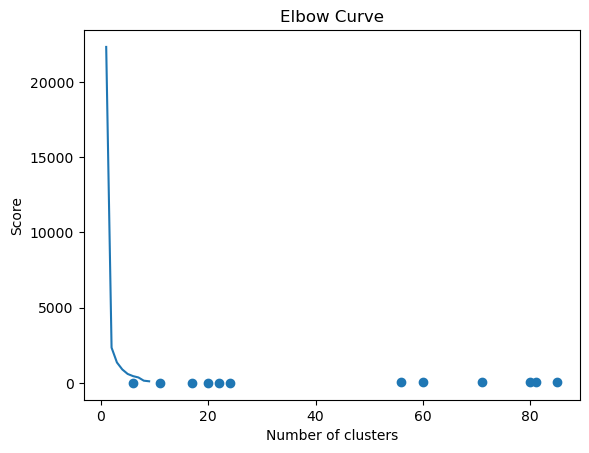

In [7]:
# 팔꿈치 방법 구현

import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

x = np.array([
     [6,3], [11,15], [17,12], [24,10], [20,25], [22,30],
     [85,70], [71,81], [60,79], [56,52], [81,91], [80,81]])

plt.scatter(X[:,0], X[:,1])

n_clusters = range(1, 10)
kmeans = [KMeans(n_clusters=i, n_init='auto') for i in n_clusters]

# 모든 샘플에 대하여 제곱 오차를 계산하여 리스트에 추가한다.
score = [kmeans[i].fit(x).inertia_ for i in range(len(kmeans))]

plt.plot(n_clusters, score)
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

c:\Users\tlstk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[0 2 1 2 0 0 3 1 2 2 3 2 1 2 0 1 1 0 3 3 0 0 1 3 3 1 0 1 3 1 2 2 1 2 2 2 2
 2 3 0 1 3 1 1 3 3 2 3 2 0 3 0 2 0 0 3 2 3 2 0 2 1 2 3 3 3 2 0 2 3 1 3 2 3
 3 2 3 1 0 2 0 1 0 0 2 1 0 1 2 2 1 0 2 3 3 1 0 0 1 3 2 0 2 0 1 0 0 1 2 1 3
 3 0 2 0 1 2 0 0 1 3 0 3 0 0 0 0 3 0 3 2 3 3 0 2 3 3 2 1 2 2 3 1 3 1 3 2 1
 2 2 2 1 2 1 0 3 2 3 0 1 2 1 1 0 1 3 3 1 0 1 1 2 0 1 3 2 0 0 1 3 0 1 3 3 1
 1 1 1 0 2 1 3 1 1 3 3 3 1 3 2 1 3 0 3 1 2 3 2 1 2 1 3 1 1 2 3 3 0 0 1 2 0
 0 3 0 3 1 2 2 1 1 2 1 0 3 1 0 3 2 3 0 1 0 2 2 2 2 3 3 2 1 3 0 1 3 3 3 0 0
 2 1 1 3 0 2 3 1 2 1 0 0 3 3 1 0 0 0 1 2 2 0 0 1 0 0 0 2 3 2 1 0 0 2 2 2 0
 0 1 2 3]


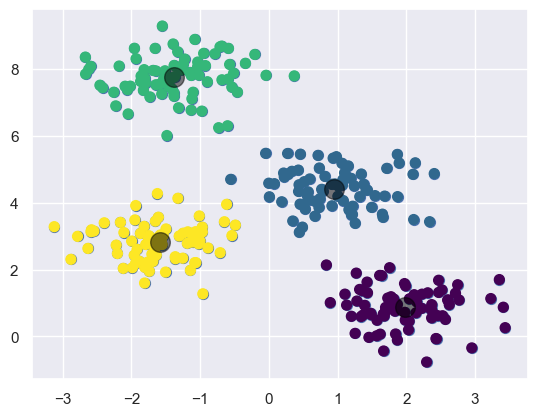

In [8]:
# K-Means 알고리즘 실습

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

x, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

plt.scatter(x[:,0], x[:,1], s=50);

kmeans = KMeans(n_clusters=4)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)
print(y_kmeans)

plt.scatter(x[:,0], x[:,1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5);
plt.show()

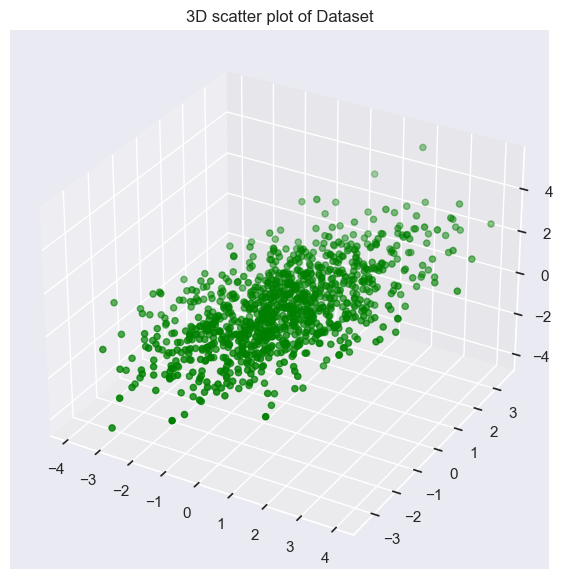

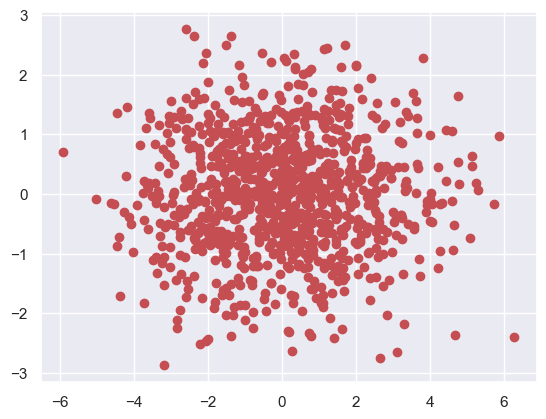

In [ ]:
# 3차원 공간의 데이터에서 주성분 찾기

import numpy as np
import matplotlib.pyplot as plt

u = np.array([1,1,1]) / np.sqrt(3)
v = np.array([1,0,-1]) /np.sqrt(2)

# 1000개의 데이터 셋 생성하기
n_data = 1000
x = []
for _ in range(n_data):
    r_coeff = np.random.randn(2,) # 2차원 랜덤값 생성
    data = 2.0* r_coeff[0] * u + r_coeff[1] * v + 0.1 * np.random.randn(3,) # 3차원 랜덤값 생성
    x.append(data) # 3차원 랜덤값을 리스트에 추가

x = np.array(x) # 리스트를 numpy 배열로 변환

# 가시화를 위한 맷플롯립 figure 만들기
fig = plt.figure(figsize = (10,7))
ax = plt.axes(projection='3d') # 3D figure 생성

# 3차원 공간에 데이터 가시화
ax.scatter3D(x[:,0], x[:,1], x[:,2], color = 'green')
plt.title('3D scatter plot of Dataset')
plt.show()

from sklearn.decomposition import PCA # 주성분 분석
pca = PCA(n_components=2) # 2차원으로 축소

x_2d_sklearn = pca.fit_transform(x) # 3차원 데이터를 2차원으로 변환
plt.scatter(x_2d_sklearn[:, 0], x_2d_sklearn[:, 1], color = 'r') # 2차원 데이터 가시화
plt.show()

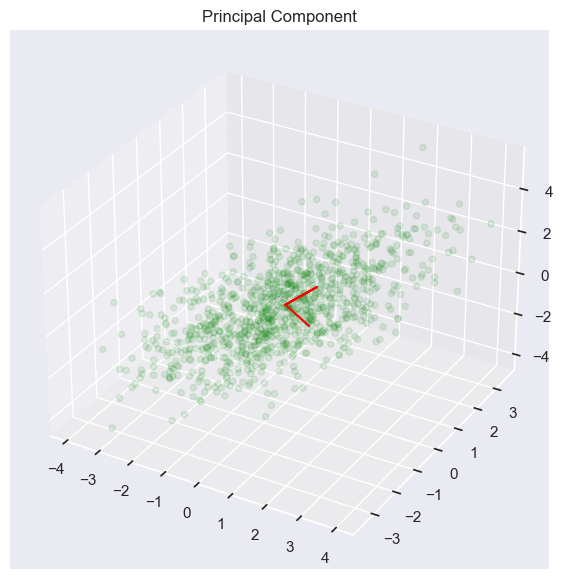

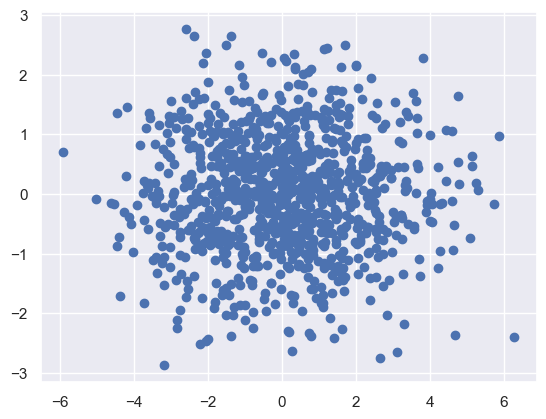

In [16]:
# 3차원 공간의 데이터에서 주성분 찾기

# 데이터가 원점을 기준으로 배치되도록 함

x_adj = x - x.mean(axis = 0) # 평균을 빼서 데이터 중심을 원점으로 옮김
u, s, vt = np.linalg.svd(x_adj) # 특이값 분해 실행
vt.T # 주성분을 담고 있는 행렬

# 찾는 주성분을 그려본다.

fig = plt.figure(figsize = (10,7))
ax = plt.axes(projection='3d') # 3D figure 생성
ax.scatter3D(x[:,0], x[:,1], x[:,2], color = 'green', alpha = 0.1) # 3차원 데이터 가시화
plt.title('Principal Component')
origin = np.zeros((1,3)) # 원점 좌표

# 주성분을 나타내는 벡터를 그리기 위한 좌표 생성
c = np.concatenate((origin,vt[0, :].reshape(-1,3),    # 주성분 1
                    origin,vt[1, :].reshape(-1,3)), axis = 0) # 주성분 2

# 주성분 그리기
ax.plot3D(c[:,0], c[:,1], c[:,2], color='red')
plt.show()

# 차원 축소를 위해서 주성분 두개에 의해 만들어지는 공간으로 데이터를 옮김
# 2차원 평면에 그림

w_2d = vt.T[:, :2] # 주성분 2개를 선택
x_2d = x_adj.dot(w_2d) # 3차원 데이터를 2차원으로 변환
plt.scatter(x_2d[:, 0], x_2d[:, 1])
plt.show() 

In [18]:
# 4차원 공간에 존재하는 붓꽃 데이터를 2차원에서 분류

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris 

iris = load_iris() # 붓꽃 데이터 세트 로드

df = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target']) # 데이터프레임 생성
print(df) 

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0       0.0  

In [19]:
# 표준화 전처리

from sklearn.preprocessing import StandardScaler
features = iris['feature_names'] # 특성 이름
print(features)

# Separating out the features
x = df.loc[:, features].values # 특성 데이터

# Separating out the target
y = df.loc[:,['target']].values # 타겟 데이터

# Standardizing the features
x = StandardScaler().fit_transform(x) # 표준화

print(x)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e

In [21]:
# 표준화된 붓꽃 데이터에 PCA를 적용

from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # 2차원으로 축소
pca_result = pca.fit_transform(x) # PCA 변환
principalDf = pd.DataFrame(data = pca_result, columns = ['PC1', 'PC2']) # PCA 결과를 데이터프레임으로 변환
principalDf, df['target']   # PCA 결과와 타겟 데이터 결합

finalDf = pd.concat([principalDf, df[['target']]], axis = 1) # PCA 결과와 타겟 데이터 결합
print(finalDf) # 최종 데이터프레임 출력

          PC1       PC2  target
0   -2.264703  0.480027     0.0
1   -2.080961 -0.674134     0.0
2   -2.364229 -0.341908     0.0
3   -2.299384 -0.597395     0.0
4   -2.389842  0.646835     0.0
..        ...       ...     ...
145  1.870503  0.386966     2.0
146  1.564580 -0.896687     2.0
147  1.521170  0.269069     2.0
148  1.372788  1.011254     2.0
149  0.960656 -0.024332     2.0

[150 rows x 3 columns]


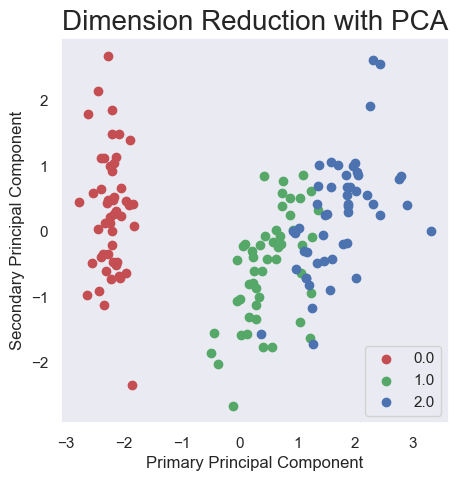

In [22]:
# 2차원 공간으로 축소된 데이터를 가시화

fig = plt.figure(figsize = (5,5))  # figure 생성
ax = fig.add_subplot(1,1,1) # subplot 생성
ax.set_xlabel('Primary Principal Component') # x축 레이블 설정
ax.set_ylabel('Secondary Principal Component') # y축 레이블 설정
ax.set_title('Dimension Reduction with PCA', fontsize = 20) # 제목 설정
targets = [0.0, 1.0, 2.0] # 타겟 클래스 설정
colors = ['r', 'g', 'b'] # 색상 설정

for target, color in zip(targets,colors): # 타겟 클래스와 색상 매칭
    idx = finalDf['target'] == target # 타겟 클래스에 해당하는 인덱스 찾기
    ax.scatter(finalDf.loc[idx, 'PC1'], finalDf.loc[idx, 'PC2']
               , c = color) # 산점도 그리기
    ax.legend(targets) # 범례 추가
    ax.grid() # 그리드 추가